<a href="https://colab.research.google.com/github/dauberson/hello-world/blob/master/Briefing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para realiza o briefing eu optei usar o Word2Vec, é uma técnica de processamento de linguagem natural(NLP) que tem a ideia de transformar uma palavra em um vetor númerico que consiga o representar semanticamente, cada palavra tem uma unica representação. Para fazer essa representação podemos usar o encoding, porem esse metodo não leva em consideração a similaridade entre as palavras. Mas temos uma solução para isso, embedding; Esse metodo consegue considerar a similaridade entre as palavras. Word2Vec usa o metodo de embedding e a similaridade entre as palavras vem atraves de palavras "vizinhas". Então para prosseguir com esse metodo, o nosso banco de dados foi preenchido com frases. 
Dado as definições acimas, usamos o Skip Gram para definir esses "vizinhos", para essa tecnica foi necessario definir um raio de vizinhança, conhecido como windows size.

In [0]:
data = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

Função que remove as palavras que redundantes

In [0]:
def remove_stop_words(corpus): 
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [0]:
data = remove_stop_words(data) #aplicando a função em cima do banco de dados

In [0]:
palavras = []
for texto in data:
    for palavra in texto.split(' '):
        palavras.append(palavra)

palavras = set(palavras)

Skip Gram em ação! windows siza = 2.

In [0]:
word2int = {}

for i,palavra in enumerate(palavras):
    word2int[palavra] = i

sentencas = []
for sentenca in data:
    sentencas.append(sentenca.split())
    
WINDOW_SIZE = 2

data2 = []
for sentenca in sentencas:
    for idx, palavra in enumerate(sentenca):
        for vizinho in sentenca[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentenca)) + 1] : 
            if vizinho != palavra:
                data2.append([palavra, vizinho])

In [0]:
import pandas as pd

df = pd.DataFrame(data2, columns = ['palavra', 'vizinho'])

In [92]:
df.head(10)

,palavra,vizinho
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [0]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(palavras)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['palavra'], df['vizinho']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [94]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 50000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  4.8001804
iteration 3000 loss is :  1.7833486
iteration 6000 loss is :  1.7253203
iteration 9000 loss is :  1.7061269
iteration 12000 loss is :  1.693076
iteration 15000 loss is :  1.681834
iteration 18000 loss is :  1.672219
iteration 21000 loss is :  1.6648515
iteration 24000 loss is :  1.6596179
iteration 27000 loss is :  1.6557524
iteration 30000 loss is :  1.6526197
iteration 33000 loss is :  1.6499487
iteration 36000 loss is :  1.6476188
iteration 39000 loss is :  1.6455579
iteration 42000 loss is :  1.6437148
iteration 45000 loss is :  1.6420516
iteration 48000 loss is :  1.6405396
iteration 51000 loss is :  1.6391562
iteration 54000 loss is :  1.637883
iteration 57000 loss is :  1.6367056
iteration 60000 loss is :  nan
iteration 63000 loss is :  nan
iteration 66000 loss is :  nan
iteration 69000 loss is :  nan
iteration 72000 loss is :  nan
iteration 75000 loss is :  nan
iteration 78000 loss is :  nan
iteration 81000 loss is :  nan
iteration 84000 loss is

In [95]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]


In [96]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['palavra'] = palavras
w2v_df = w2v_df[['palavra', 'x1', 'x2']]
w2v_df

,palavra,x1,x2
0,woman,NaN,NaN
1,man,NaN,NaN
2,princess,NaN,NaN
3,king,NaN,NaN
4,girl,NaN,NaN
5,prince,NaN,NaN
6,wise,NaN,NaN
7,young,NaN,NaN
8,strong,NaN,NaN
9,pretty,NaN,NaN


ValueError: ignored

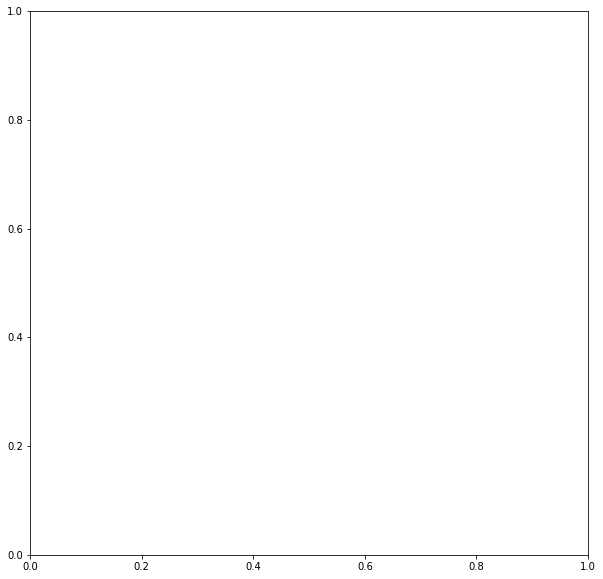

In [97]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['palavra'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()